In [1]:
import datetime as dt

In [2]:
import tensorflow.keras

2024-05-07 23:53:17.086123: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
from tensorflow.keras.layers import Dense  

In [5]:
from tensorflow.keras.layers import LSTM

In [6]:
from tensorflow.keras.layers import Dropout 

In [7]:
from tensorflow.keras.models import Sequential, load_model 

In [8]:
import matplotlib.pyplot as plt

In [9]:
plt.style.use('fivethirtyeight')

In [10]:
import numpy as np

In [11]:
import os

In [12]:
import pandas as pd

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
import statistics

In [15]:
import tensorflow as tf

In [16]:
import time

In [17]:
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools

In [18]:
train_YN = 'Y'

In [19]:
initial_path = ''

In [20]:
plot_data = 'Y'

In [21]:
processed_train_file_name = 'train.csv'

In [22]:
processed_test_file_name = 'test.csv'

In [23]:
train_record_number = 1824

In [24]:
test_record_number = 396

In [25]:
training_batch_size = 32

In [26]:
loss = 0

In [27]:
model_file = 'glucosemodel.h5'

In [28]:
train_df = pd.read_csv(str(processed_train_file_name), index_col=False)

In [29]:
train_df.head()

,Time,BG,Date,Hour
0,2019-05-01 00:00:00,149.02,2019-05-01,0
1,2019-05-01 00:03:00,149.02,2019-05-01,0
2,2019-05-01 00:06:00,149.02,2019-05-01,0
3,2019-05-01 00:09:00,149.02,2019-05-01,0
4,2019-05-01 00:12:00,149.02,2019-05-01,0


In [30]:
train_df.tail()

,Time,BG,Date,Hour
36475,2019-07-15 23:45:00,154.484274,2019-07-15,23
36476,2019-07-15 23:48:00,153.629856,2019-07-15,23
36477,2019-07-15 23:51:00,152.796860,2019-07-15,23
36478,2019-07-15 23:54:00,151.985465,2019-07-15,23
36479,2019-07-15 23:57:00,151.195800,2019-07-15,23


In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36480 entries, 0 to 36479
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    36480 non-null  object 
 1   BG      36480 non-null  float64
 2   Date    36480 non-null  object 
 3   Hour    36480 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB


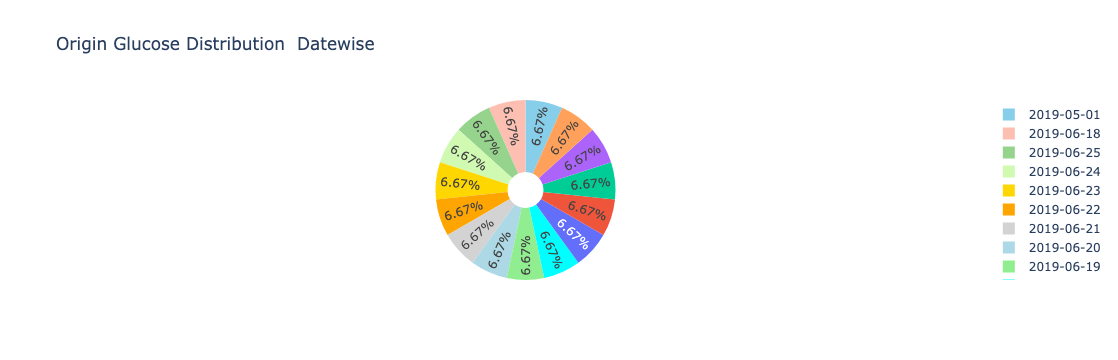

In [32]:
dff = train_df['Date'].value_counts()[:15]
label = dff.index
size = dff.values

colors = ['skyblue', '#FEBFB3', '#96D38C', '#D0F9B1', 'gold', 'orange', 'lightgrey', 
          'lightblue','lightgreen','aqua']
trace = go.Pie(labels=label, values=size, marker=dict(colors=colors),hole = .2)

data = [trace]
layout = go.Layout(
    title='Origin Glucose Distribution  Datewise'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

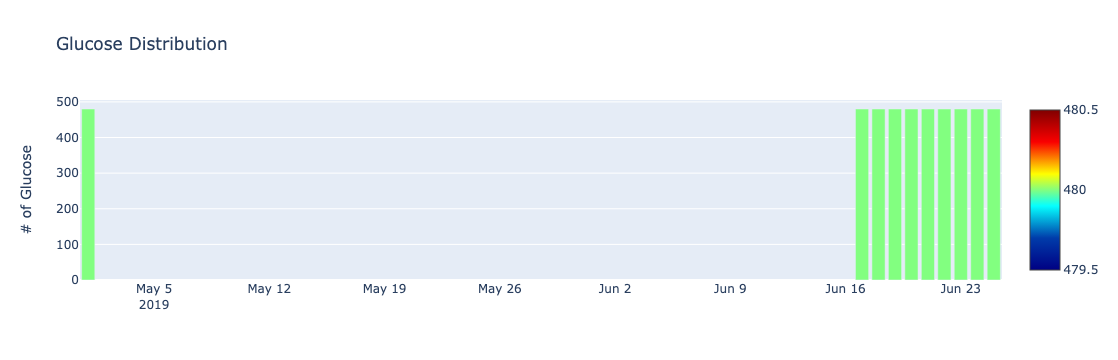

In [33]:
dff = train_df.Date.value_counts()[:10]

trace = go.Bar(
    x=dff.index,
    y=dff.values,
    marker=dict(
        color = dff.values,
        colorscale='Jet',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(
    title='Glucose Distribution', 
    yaxis = dict(title = '# of Glucose')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

<Figure size 2000x1200 with 0 Axes>

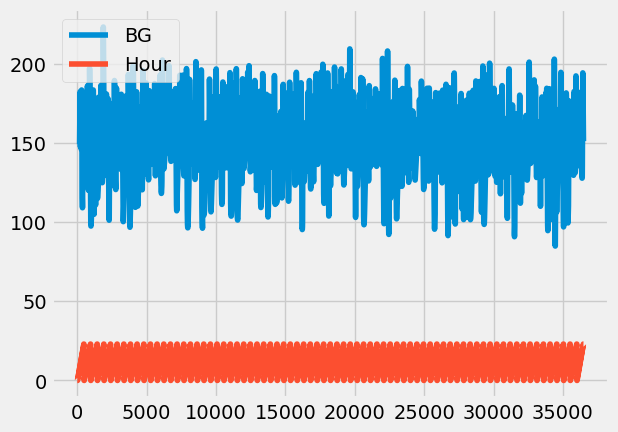

In [34]:
plt.figure(figsize=(20,12))
train_df.plot()
plt.show()

In [35]:
test_df = pd.read_csv(str(processed_test_file_name), index_col=False)

In [36]:
train_means = train_df['BG'].groupby([train_df['Date'], train_df['Hour']]).mean()
print('Finished grouping by date for train')

Finished grouping by date for train


In [37]:
test_means = test_df['BG'].groupby([test_df['Date'], test_df['Hour']]).mean()
print('Finished grouping by date for test')

Finished grouping by date for test


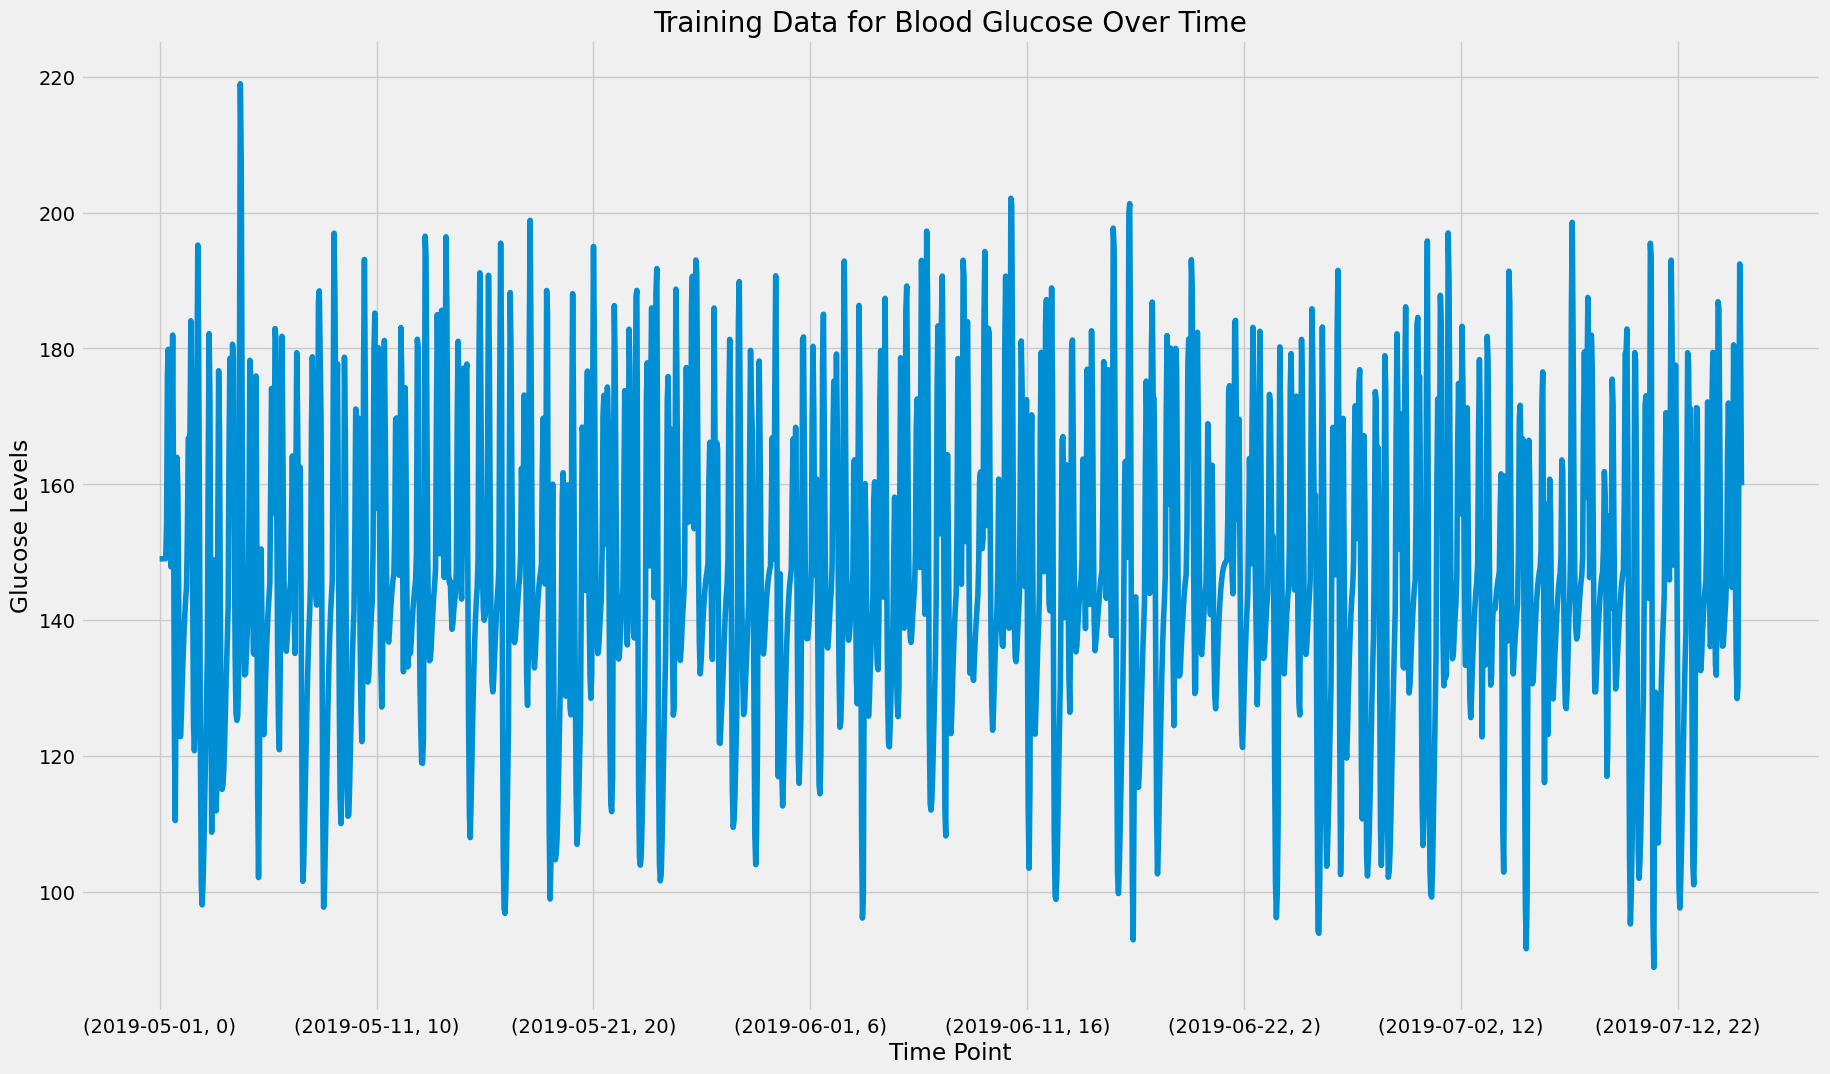

Beginning date for train_means
Date        Hour
2019-05-01  0       149.020011
Name: BG, dtype: float64
Ending date for train_means
Date        Hour
2019-07-15  23      159.858921
Name: BG, dtype: float64


/var/folders/77/cc8xhq5d3pd21lf9hdjl7stw0000gp/T/ipykernel_1383/1679677331.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/77/cc8xhq5d3pd21lf9hdjl7stw0000gp/T/ipykernel_1383/1679677331.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [38]:
if(plot_data == 'Y'):
    plt.figure(figsize=(20,12))
    train_means.plot(kind='line', title='Training Data for Blood Glucose Over Time')
    plt.xlabel('Time Point')  
    plt.ylabel('Glucose Levels')
    plt.show()
    print('Beginning date for train_means')
    print(train_means[[0]])
    print('Ending date for train_means')
    print(train_means[[len(train_means) - 1]])

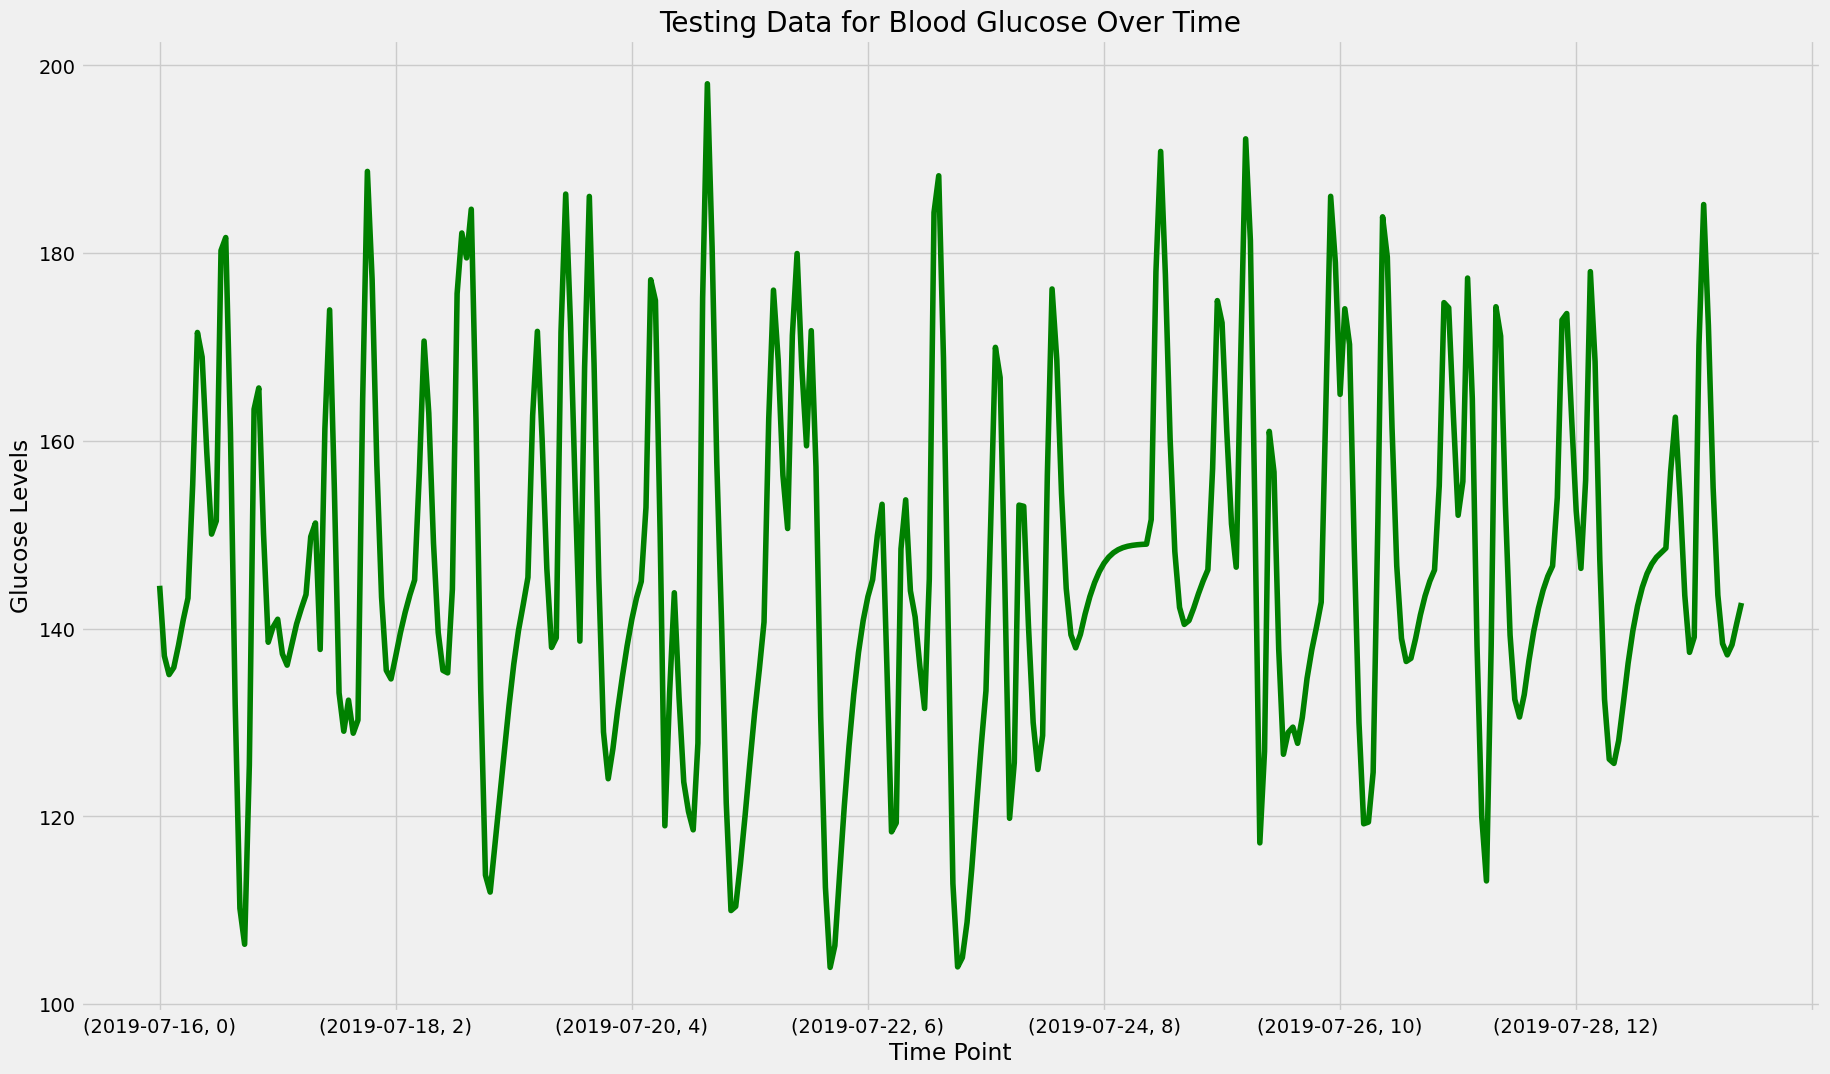

Beginning date for test_means
Date        Hour
2019-07-16  0       144.555197
Name: BG, dtype: float64
Ending date for test_means
Date        Hour
2019-07-29  23      142.72328
Name: BG, dtype: float64

Finished Part 8 of 19 - Plot train and test data.  Ready to move to next cell.


/var/folders/77/cc8xhq5d3pd21lf9hdjl7stw0000gp/T/ipykernel_1383/787658178.py:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/77/cc8xhq5d3pd21lf9hdjl7stw0000gp/T/ipykernel_1383/787658178.py:11: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [39]:
if(plot_data == 'Y'):
    plt.figure(figsize=(20,12))
    test_means.plot(kind='line', color='green', title='Testing Data for Blood Glucose Over Time')
    plt.xlabel('Time Point')  
    plt.ylabel('Glucose Levels')
    plt.show()  
    
    print('Beginning date for test_means')
    print(test_means[[0]])
    print('Ending date for test_means')
    print(test_means[[len(test_means) - 1]])
    
print('\nFinished Part 8 of 19 - Plot train and test data.  Ready to move to next cell.')

In [40]:
print('Begin adding elements to train_glucose_df')   
train_glucose_df = pd.DataFrame(columns=['Date_Hour', 'Glucose_Level'])
for i in range(0, len(train_means)):
    temp_date = train_means.index[[i][0]]
    temp_date_hour = str(temp_date[0]) + ':' + str(temp_date[1])
    train_glucose_level = train_means[[i][0]]
    train_glucose_df.loc[len(train_glucose_df)] = [temp_date_hour, train_glucose_level]
print('Finished adding elements to train_glucose_df')

Begin adding elements to train_glucose_df


/var/folders/77/cc8xhq5d3pd21lf9hdjl7stw0000gp/T/ipykernel_1383/3966179368.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/77/cc8xhq5d3pd21lf9hdjl7stw0000gp/T/ipykernel_1383/3966179368.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/77/cc8xhq5d3pd21lf9hdjl7stw0000gp/T/ipykernel_1383/3966179368.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/77/cc8xhq5d3pd21lf9hdjl7stw0000gp/T/ipyker

Finished adding elements to train_glucose_df


/var/folders/77/cc8xhq5d3pd21lf9hdjl7stw0000gp/T/ipykernel_1383/3966179368.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/77/cc8xhq5d3pd21lf9hdjl7stw0000gp/T/ipykernel_1383/3966179368.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/77/cc8xhq5d3pd21lf9hdjl7stw0000gp/T/ipykernel_1383/3966179368.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/77/cc8xhq5d3pd21lf9hdjl7stw0000gp/T/ipyker

In [41]:
test_glucose_df = pd.DataFrame(columns=['Date_Hour', 'Glucose_Level'])
for i in range(0, len(test_means)):
    temp_date = test_means.index[[i][0]]
    temp_date_hour = str(temp_date[0]) + ':' + str(temp_date[1])
    test_glucose_level = test_means[[i][0]]
    test_glucose_df.loc[len(test_glucose_df)] = [temp_date_hour, test_glucose_level]
print('Finished adding elements to test_glucose_df') 

/var/folders/77/cc8xhq5d3pd21lf9hdjl7stw0000gp/T/ipykernel_1383/42106882.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/77/cc8xhq5d3pd21lf9hdjl7stw0000gp/T/ipykernel_1383/42106882.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/77/cc8xhq5d3pd21lf9hdjl7stw0000gp/T/ipykernel_1383/42106882.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/77/cc8xhq5d3pd21lf9hdjl7stw0000gp/T/ipykernel_13

Finished adding elements to test_glucose_df


/var/folders/77/cc8xhq5d3pd21lf9hdjl7stw0000gp/T/ipykernel_1383/42106882.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/77/cc8xhq5d3pd21lf9hdjl7stw0000gp/T/ipykernel_1383/42106882.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/77/cc8xhq5d3pd21lf9hdjl7stw0000gp/T/ipykernel_1383/42106882.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/77/cc8xhq5d3pd21lf9hdjl7stw0000gp/T/ipykernel_13

In [42]:
glucose_training_set = train_glucose_df.iloc[:,1:2].values

In [43]:
scaler = MinMaxScaler(feature_range = (0,1))

In [44]:
glucose_training_set_scaled = scaler.fit_transform(glucose_training_set)

In [45]:
features_set = []  
labels = []  

In [46]:
for i in range(60, train_record_number):  
    features_set.append(glucose_training_set_scaled[i-60:i, 0])
    labels.append(glucose_training_set_scaled[i, 0])

In [47]:
features_set, labels = np.array(features_set), np.array(labels)

In [48]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [49]:
if train_YN == 'Y':
    model = Sequential() 
    model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))  
    model.add(Dropout(0.2))  
    model.add(LSTM(units=50, return_sequences=True))  
    model.add(Dropout(0.2))

    model.add(LSTM(units=50, return_sequences=True))  
    model.add(Dropout(0.2))

    model.add(LSTM(units=50))  
    model.add(Dropout(0.2)) 

    model.add(Dense(units = 1))  

    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [50]:
num_epochs = 100

In [ ]:
if train_YN == 'Y':
    from tensorflow.keras.callbacks import EarlyStopping
    es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=100)
    history = model.fit(features_set, labels, epochs = num_epochs, batch_size = training_batch_size, callbacks = [es])  

    loss = model.evaluate(features_set, labels, verbose=0)
    print('\nUnscaled Loss = ' + str(loss))
    model.save(str(initial_path + model_file))


Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - loss: 0.0649
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - loss: 0.0311
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 0.0321
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - loss: 0.0314
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 162ms/step - loss: 0.0302
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - loss: 0.0282
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - loss: 0.0303
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 0.0309
Epoch 9/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 169ms/step - loss: 0.0282
Epoch 10/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - loss: 0.0294
Epoch 11/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 0.0300
Epoch 12/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0281
Epoch 13/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 0.0262
Epoch 14/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0276
Epoch 15/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 14s 1

In [ ]:
glucose_total = pd.DataFrame(columns=['Glucose_Level'])

In [ ]:
glucose_total = pd.concat((train_glucose_df['Glucose_Level'], test_glucose_df['Glucose_Level']), axis=0) 

In [ ]:
test_inputs = glucose_total[len(train_glucose_df) - 60:].values 

In [ ]:
test_inputs = test_inputs.reshape(-1,1)  

In [ ]:
test_inputs = scaler.transform(test_inputs)

In [ ]:
test_features = []  

In [ ]:
for i in range(60, test_record_number):  
    test_features.append(test_inputs[i-60:i, 0])

In [ ]:
test_features = np.array(test_features)  

In [ ]:
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [ ]:
model = load_model(str(initial_path + model_file))

In [ ]:
predictions = model.predict(test_features)  

In [ ]:
predictions = scaler.inverse_transform(predictions)

In [ ]:
actual_predicted_difference_list = []

In [ ]:
for i in range(0,len(predictions)):
    print('\nActual value for ' + str(test_glucose_df.loc[i,'Date_Hour']) + ' = ' 
          + str(test_glucose_df.loc[i,'Glucose_Level']))
    print('Predicted value = {0}'.format(predictions[i,0]))
    actual_predicted_difference_list.append((predictions[i,0] - test_glucose_df.loc[i,'Glucose_Level']) ** 2)

In [ ]:
mean_square = statistics.mean(actual_predicted_difference_list)
print('Mean square error = ' + str(mean_square))

In [ ]:
actual = test_glucose_df['Glucose_Level'].values
actual = actual[0:len(test_glucose_df)]

In [ ]:
print('\n\nPlotting predictions')
plt.figure(figsize=(20,12))  
plt.plot(actual, color='blue', label='Actual Glucose Levels')  
plt.plot(predictions , color='red', label='Predicted Glucose Levels')  
plt.title('Glucose Levels Prediction LSTM. Training Loss = ' +
         str(loss) + '\nMean Square Error = ' + str(mean_square) + '\n' + str(num_epochs) + ' Epochs, ' +
         'Batch Size = ' + str(training_batch_size))  
plt.xlabel('Time Point')  
plt.ylabel('Glucose Levels')  
plt.legend()  
plt.show() 

In [ ]:
print('Training Loss = ' + str(loss))
print('Mean Square Error = ' + str(mean_square))

In [ ]:
train_df.head()

In [ ]:
ds = train_df[["Time", "BG"]].head(1000)

In [ ]:
ds.Time=pd.to_datetime(ds.Time)

In [ ]:
ds.info()

In [ ]:
ds.index = ds["Time"]

In [ ]:
ds.drop(["Time"], inplace=True, axis=1)

In [ ]:
ds.index = pd.DatetimeIndex(ds.index.values,
                               freq=ds.index.inferred_freq)

In [ ]:
ds.info()

In [ ]:
ds.head()

In [ ]:
rolmean = ds.rolling(window=12).mean()
rolstd = ds.rolling(window=12).std()
print(rolmean,rolstd)

In [ ]:
orig = plt.plot(ds, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
from pylab import rcParams

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('BG')
plt.plot(ds['BG'])
plt.title('Blood Glucose')
plt.show()

In [ ]:
ds.plot(kind='kde')

In [ ]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(ds)

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(ds)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

In [ ]:
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('BG')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [ ]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       
                      max_p=3, max_q=3, 
                      m=1,              
                      d=None,           
                      seasonal=False,  
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
model = ARIMA(train_data, order=(1,1,2))  
fitted = model.fit()  
print(fitted.summary())

In [ ]:
result = fitted.forecast(321, alpha=0.05)  

In [ ]:
result

In [ ]:
type(result)

In [ ]:
train_series = pd.read_csv(processed_train_file_name, header=0, usecols=["Time", "BG"], index_col=0, parse_dates=True)['BG']
train_series.index = train_series.index.to_period('H')

In [ ]:
test_series = pd.read_csv(processed_test_file_name, header=0, usecols=["Time", "BG"], index_col=0, parse_dates=True)['BG']
test_series.index = test_series.index.to_period('H')

In [ ]:
train_series

In [ ]:
type(train_series.index)

In [ ]:
model = ARIMA(train_series, order=(5,1,0))

In [ ]:
model_fit = model.fit()

In [ ]:
print(model_fit.summary())

In [ ]:
train = train_series.values

In [ ]:
test = test_series.values

In [ ]:
history = [x for x in train]

In [ ]:
predictions = list()

In [ ]:
for t in range(500):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    

In [ ]:
# Ensure consistency in array lengths
if len(test) != len(predictions):
    min_len = min(len(test), len(predictions))
    test = test[:min_len]
    predictions = predictions[:min_len]

# Subset the data to only include the first 500 points
test_subset = test[:500]
predictions_subset = predictions[:500]

# Calculate RMSE for the subset
rmse_subset = sqrt(mean_squared_error(test_subset, predictions_subset))
print('Subset RMSE: %.3f' % rmse_subset)

# Plot only the first 500 data points
import matplotlib.pyplot as plt

plt.plot(test_subset, label='Actual Data')
plt.plot(predictions_subset, color='red', label='Predicted Data')
plt.title('Glucose Levels Prediction ARIMA (First 500 Data Points)')
plt.xlabel('Time Point')
plt.ylabel('Glucose Levels')
plt.legend()
plt.show()


In [ ]:
# Ensure consistency in array lengths
if len(test) != len(predictions):
    min_len = min(len(test), len(predictions))
    test = test[:min_len]
    predictions = predictions[:min_len]

# Calculate RMSE with consistent array lengths
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# Plot the data
plt.plot(test, label='test data')
plt.plot(predictions, color='red', label='predictions')
plt.title('Glucose Levels Prediction ARIMA. Training Loss = ' +
         str(loss) + '\nMean Squared Error = ' + str(rmse) + '\n' + str(num_epochs) + ' Epochs, ' +
         'Batch Size = ' + str(training_batch_size))  
plt.xlabel('Time Point')  
plt.ylabel('Glucose Levels')  
plt.legend()
plt.show()
